# Titanic - Machine Learning from Disaster

LEARNING FROM
https://www.kaggle.com/code/startupsci/titanic-data-science-solutions


In [209]:
import numpy as np
import pandas as pd
import os

## LOAD DATA

In [210]:

cwd = os.getcwd()
# print(cwd)
# train_data = pd.read_csv(os.path.join(
#     cwd, "/input/train.csv"
# ))
train_data = pd.read_csv(".\\input\\train.csv")
test_data = pd.read_csv(".\\input\\test.csv")
# test_data = pd.read_csv(os.path.join(
#     cwd, "Titanic-Machine-Learning-from-Disaster/input/test.csv"
# ))

# combined = [train_data, test_data]

## A LOOK AT DATA

In [211]:
train_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [212]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [213]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- categorical ones?
- numerical ones? continuous or discrete?
- some points:
    - `Ticket` is a mix of numeric and alphanumeric data types.
    `Cabin` is alphanumeric.
- which features may contain errors or typos?
- which features contain `NA`s? `Cabin`, `Age`, `Embarked`

In [214]:
train_data.info()
print('=' * 50)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

## DESCRIBE DATA DISTRIBUTION
- `include=["O"]` selects non-numeric columns
- `EMBARKED` => where the passenger got on board?

In [215]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [216]:
train_data.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## SOME ASSUMPTIONS PROVIDED WITH THE DATASET
- Women (`Sex=female`) were more likely to have survived.
- Children (`Age<?`) were more likely to have survived.
- The upper-class passengers (`Pclass=1`) were more likely to have survived.

In [217]:
## choose only the grouping column and the aggregated column
print(train_data[["Pclass", "Survived"]].groupby("Pclass")
      .mean().sort_values(by="Survived", ascending=False))
print('=' * 50)
print(train_data[["Sex", "Survived"]].groupby("Sex")
      .mean().sort_values(by="Survived", ascending=False))
print('=' * 50)

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
        Survived
Sex             
female  0.742038
male    0.188908


In [218]:
print(train_data[["SibSp", "Survived"]].groupby("SibSp").mean())
        # .sort_values(by="Survived", ascending=False))
print('=' * 50)
print(train_data[["Parch", "Survived"]].groupby("Parch")
      .mean().sort_values(by="Survived", ascending=False))

       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000
       Survived
Parch          
3      0.600000
1      0.550847
2      0.500000
0      0.343658
5      0.200000
4      0.000000
6      0.000000


In [219]:
import seaborn as sns
import matplotlib.pyplot as plt

## SOME VISUALIZATIONS
- to show relationships between variables

### VISUALIZING NUMERICAL VARIABLE (`Age`)

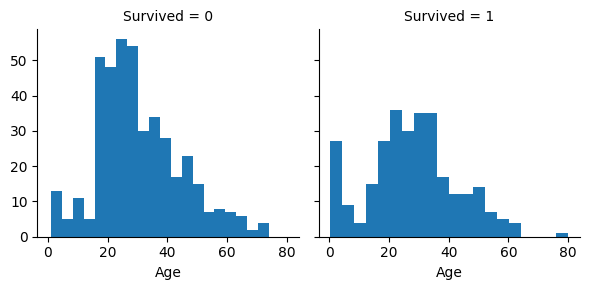

In [220]:
g = sns.FacetGrid(train_data, col="Survived")
g.map(plt.hist, "Age", bins=20)


### VISUALIZING ORDINAL VARIABLE (`Pclass`)

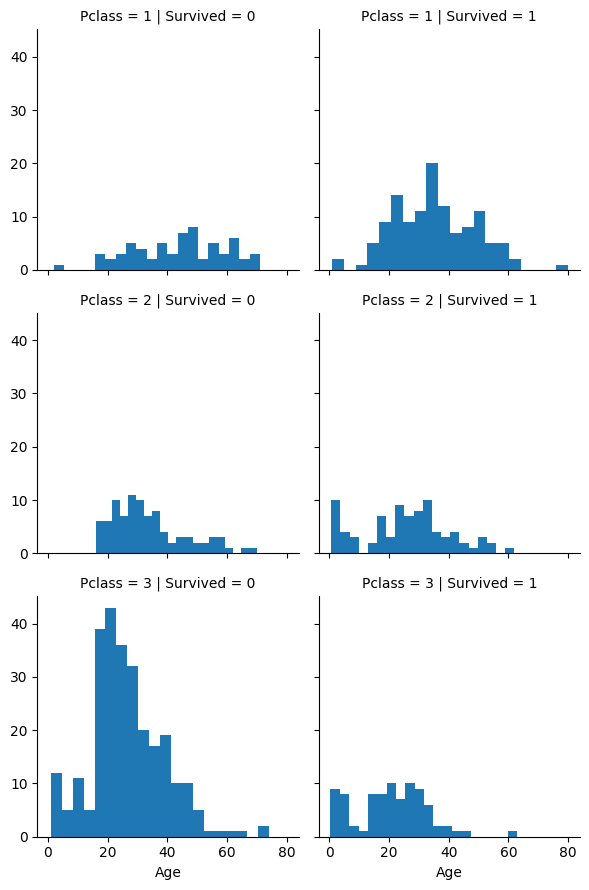

In [221]:
grid = sns.FacetGrid(train_data, col="Survived", row="Pclass")
grid.map(plt.hist, "Age", bins=20)

### VISUALIZING CATEGORICAL VARIABLE (`Embarked`)

- Turns out this plot from the tutorial is wrong...
- For `embarked == 'C'`, the orange line is for male, blue line for male
- The plot generated in R version is correct, checked with raw data in spreadsheets

D:\L\Python\Python39\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\L\Python\Python39\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


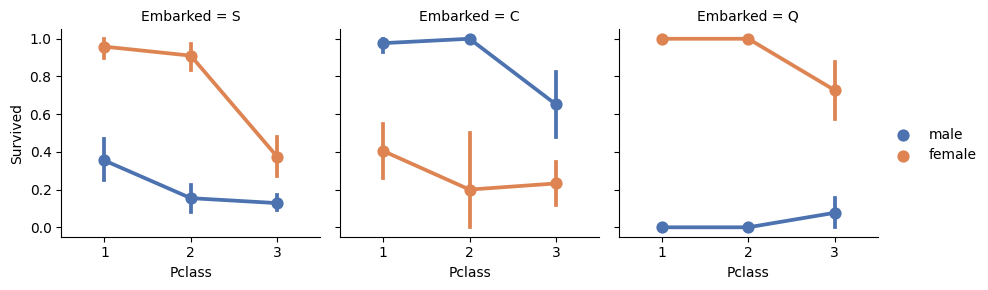

In [222]:
grid = sns.FacetGrid(train_data, col="Embarked")
grid.map(sns.pointplot, "Pclass", "Survived", "Sex", palette="deep")
grid.add_legend()

### CORRELATE CATEGORICAL FEATURES AND NUMERIC FEATURES
- 个人觉得这图没什么用


D:\L\Python\Python39\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


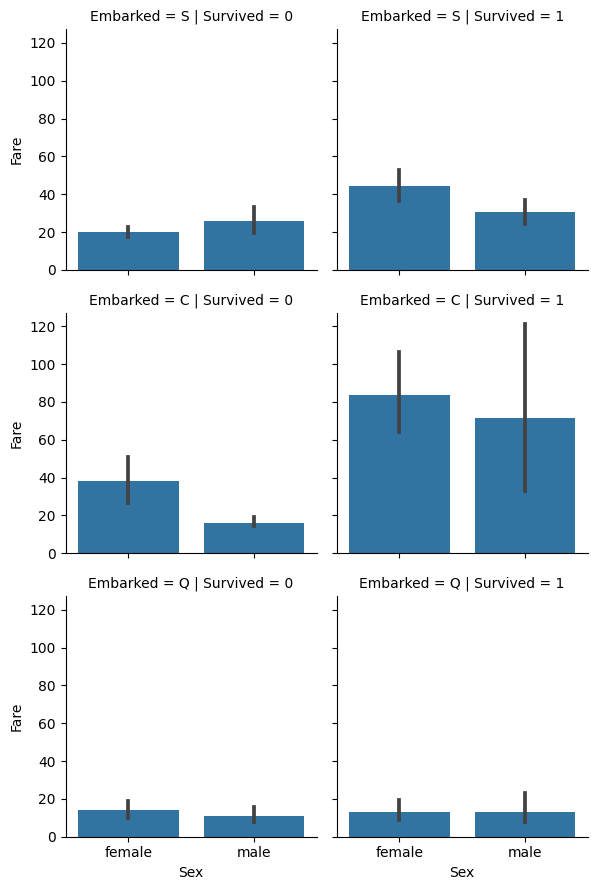

In [223]:
grid = sns.FacetGrid(train_data, row="Embarked", col="Survived")
grid.map(sns.barplot, "Sex", "Fare", )# palette="deep")
grid.add_legend()

## DROP SOME VARIABLES (`Ticket`, `Cabin`)
- messy data, and not really useful

In [224]:
train_data = train_data.drop(['Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin'], axis=1)
combined = [train_data, test_data]

## CREATE NEW FEATURE

### extract `Title` from `Name`

In [225]:
for dataset in combined:
    dataset["Title"] = dataset["Name"].str.extract(
        '([A-Za-z]+)\.', expand=False
    )
pd.crosstab(train_data["Title"], train_data["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [226]:
## put many titles with a more common name
for dataset in combined:
    dataset["Title"] = dataset["Title"].replace(
        ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],
        'Rare'
    )
    dataset['Title'] = dataset['Title'].replace("Mlle", "Miss")
    dataset['Title'] = dataset['Title'].replace("Ms", "Miss")
    dataset['Title'] = dataset['Title'].replace("Mme", "Mrs")
train_data[["Title", "Survived"]].groupby(["Title"]).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [227]:
## convert categorical Title into ordinal
title_mapping = {
    "Mr": 1,
    "Miss": 2,
    "Mrs": 3,
    "Master": 4,
    "Rare": 5,
}
for dataset in combined:
    dataset["Title"] = dataset["Title"].map(title_mapping)
    dataset["Title"].fillna(0, inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


## CONTINUE DROPPING FEATURES
- `Name` now replaced by `Title`
- drop `PassengerId`

In [228]:
train_data = train_data.drop(["Name", "PassengerId"], axis=1)
test_data = test_data.drop(["Name"], axis=1)
combined = [train_data, test_data]
train_data.shape, test_data.shape

((891, 9), (418, 9))

## CONVERT ALPHA CATEGORICAL FEATURE TO NUMERICAL VALUES
- represent `Sex` with 0/1

In [229]:
for dataset in combined:
    dataset["Sex"] = dataset["Sex"].map({
        "female": 0,
        "male": 1
    }).astype(int)
train_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.728395
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,1.030039
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,5.000000


## FILL `NA`s

## Fill `NA`s in `Age`

In [230]:
## two Sex, three Pclass
## guess age based on these two factors
guess_ages = np.zeros((2, 3))
# for dataset in combined:
#     for i in range(2):
#         for j in range(3):
#             ## grouping, so no loc[]
#             guess_ages[i,j] = dataset[(dataset["Sex"] == i) & \
#                                (dataset["Pclass"] == j + 1)]["Age"]\
#                     .dropna().median()

for i in range(2):
    for j in range(3):
        ## grouping, so no loc[]
        guess_ages[i,j] = pd.concat([train_data[(train_data["Sex"] == i) & \
                           (train_data["Pclass"] == j + 1)]["Age"].dropna(),
                                    test_data[(test_data["Sex"] == i) & \
                           (test_data["Pclass"] == j + 1)]["Age"].dropna()]).median()
guess_ages = ((guess_ages /  0.5 + 0.5) * 0.5)
guess_ages

array([[36.25, 28.25, 22.25],
       [42.25, 29.75, 25.25]])

- seems like the commented code from tutorial calculates median age in the test data only
- should calculate median age based on the entire training and testing data

In [231]:
for dataset in combined:
    for i in range(2):
        for j in range(3):
            ## filtering rows, so loc[]
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) &\
                        (dataset.Pclass == j+1), "Age"] = guess_ages[i,j]
    dataset["Age"] = dataset["Age"].astype(int)
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22,1,0,7.2500,S,1
1,1,1,0,38,1,0,71.2833,C,3
2,1,3,0,26,0,0,7.9250,S,2
3,1,1,0,35,1,0,53.1000,S,3
4,0,3,1,35,0,0,8.0500,S,1
5,0,3,1,25,0,0,8.4583,Q,1
6,0,1,1,54,0,0,51.8625,S,1
7,0,3,1,2,3,1,21.0750,S,4
8,1,3,0,27,0,2,11.1333,S,3
9,1,2,0,14,1,0,30.0708,C,3


In [232]:
## cut Age into bands, then ordinalize it
# train_data["AgeBand"] = pd.cut(train_data["Age"], bins=5, labels=range(5))
# 不能直接指定bin名称，因为要根据cut的边界给test_data划分
train_data["AgeBand"] = pd.cut(train_data["Age"], bins=5)
train_data[['AgeBand', "Survived"]].groupby("AgeBand").mean()

,Survived
AgeBand,
"(-0.08, 16.0]",0.550000
"(16.0, 32.0]",0.337374
"(32.0, 48.0]",0.412037
"(48.0, 64.0]",0.434783
"(64.0, 80.0]",0.090909


In [233]:
for dataset in combined:    
    dataset.loc[ dataset['Age'] <= 16, "Age"] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), "Age"] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), "Age"] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), "Age"] = 3
    dataset.loc[ dataset['Age'] > 64, "Age"]
train_data.head()
# test_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,1,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,0,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,0,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,0,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,1,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [234]:
## then remove the `AgeBand` variable
# inplace deleting column, so one-time only
train_data.drop(["AgeBand"], inplace=True, axis=1)
combined = [train_data, test_data]

## CREATE NEW FEATURE COMBINING EXISTING FEATURES
### create `IsAlone` and replace `Parch` and `SibSp` with it

In [235]:
## what is `Parch`? what is `SibSp`?
for dataset in combined:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
train_data[["FamilySize", "Survived"]].groupby(["FamilySize"])\
    .mean().sort_values(by="Survived", ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [236]:
## replace `FamilySize` with `IsAlone` (孤儿)
for dataset in combined:
    dataset["IsAlone"] = 0
    dataset.loc[dataset["FamilySize"] == 1, "IsAlone"] = 1
train_data[["IsAlone", "Survived"]].groupby("IsAlone").mean()

,Survived
IsAlone,
0,0.505650
1,0.303538


In [237]:
train_data = train_data.drop(["Parch", "SibSp", "FamilySize"], axis=1)
test_data = test_data.drop(["Parch", "SibSp", "FamilySize"], axis=1)
combined = [train_data, test_data]
train_data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,1,1,7.2500,S,1,0
1,1,1,0,2,71.2833,C,3,0
2,1,3,0,1,7.9250,S,2,1
3,1,1,0,2,53.1000,S,3,0
4,0,3,1,2,8.0500,S,1,1
5,0,3,1,1,8.4583,Q,1,1
6,0,1,1,3,51.8625,S,1,1
7,0,3,1,0,21.0750,S,4,0
8,1,3,0,1,11.1333,S,3,0
9,1,2,0,0,30.0708,C,3,0


### create a feature combining `Pclass` and `Age`
- 不得不说有点刻意

In [238]:
for dataset in combined:
    dataset["Age*Pclass"] = dataset["Age"] * dataset["Pclass"]
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,1,1,7.2500,S,1,0,3
1,1,1,0,2,71.2833,C,3,0,2
2,1,3,0,1,7.9250,S,2,1,3
3,1,1,0,2,53.1000,S,3,0,2
4,0,3,1,2,8.0500,S,1,1,6


## FILL `NA`s IN `Embarked`

In [239]:
freq_port = train_data.Embarked.dropna().mode()[0]
for dataset in combined:
    dataset["Embarked"].fillna(freq_port, inplace=True)
train_data[["Embarked", "Survived"]].groupby(["Embarked"]).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [240]:
## Ordinalize
for dataset in combined:
    dataset['Embarked'] = dataset['Embarked'].map({
        'S':0,
        'C':1,
        'Q':2,
    }).astype(int)
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,1,1,7.2500,0,1,0,3
1,1,1,0,2,71.2833,1,3,0,2
2,1,3,0,1,7.9250,0,2,1,3
3,1,1,0,2,53.1000,0,3,0,2
4,0,3,1,2,8.0500,0,1,1,6


## FILL `NA`s IN `Fare` (in test dataset)

In [241]:
test_data["Fare"].fillna(test_data["Fare"].dropna().median(), inplace=True)
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,892,3,1,2,7.8292,2,1,1,6
1,893,3,0,2,7.0000,0,3,0,6
2,894,2,1,3,9.6875,2,1,1,6
3,895,3,1,1,8.6625,0,1,1,3
4,896,3,0,1,12.2875,0,3,0,3


## Ordinalize `Fare`

In [242]:
## cut Fare
train_data["FareBand"] = pd.qcut(train_data["Fare"], 4)
train_data[['FareBand', 'Survived']].groupby(['FareBand'])\
    .mean().sort_values(by='FareBand', ascending=True)

,Survived
FareBand,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [243]:
for dataset in combined:
    dataset.loc[ dataset["Fare"] <= 7.91, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 7.91) & (dataset["Fare"] <= 14.454), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 14.454) & (dataset["Fare"] <= 31), "Fare"]   = 2
    dataset.loc[dataset["Fare"] > 31, "Fare"] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_data = train_data.drop(["FareBand"], axis=1)
combined = [train_data, test_data]
    
train_data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,1,1,0,0,1,0,3
1,1,1,0,2,3,1,3,0,2
2,1,3,0,1,1,0,2,1,3
3,1,1,0,2,3,0,3,0,2
4,0,3,1,2,1,0,1,1,6
5,0,3,1,1,1,2,1,1,3
6,0,1,1,3,3,0,1,1,3
7,0,3,1,0,2,0,4,0,0
8,1,3,0,1,1,0,3,0,3
9,1,2,0,0,2,1,3,0,0


In [244]:
test_data.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,892,3,1,2,0,2,1,1,6
1,893,3,0,2,0,0,3,0,6
2,894,2,1,3,1,2,1,1,6
3,895,3,1,1,1,0,1,1,3
4,896,3,0,1,1,0,3,0,3
5,897,3,1,0,1,0,1,1,0
6,898,3,0,1,0,2,2,1,3
7,899,2,1,1,2,0,1,0,2
8,900,3,0,1,0,1,3,1,3
9,901,3,1,1,2,0,1,0,3


## MODEL

In [245]:
X_train = train_data.drop(["Survived",], axis=1)
Y_train = train_data["Survived"]
X_test = test_data.drop(["PassengerId",], axis=1).copy()

### Logistic Regression model

In [246]:
from sklearn.linear_model import LogisticRegression

In [247]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

- Coefficients

In [248]:
coeff = pd.DataFrame(train_data.columns.delete(0))
coeff.columns = ["Feature"]
coeff["Correlation"] = pd.Series(logreg.coef_[0])
coeff

,Feature,Correlation
0,Pclass,-0.750791
1,Sex,-2.201548
2,Age,0.287078
3,Fare,-0.086784
4,Embarked,0.261586
5,Title,0.398018
6,IsAlone,0.126717
7,Age*Pclass,-0.311138


### Support Vector Machine

In [249]:
from sklearn.svm import SVC, LinearSVC

In [250]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

### KNN k-Nearest Neighbors

In [251]:
from sklearn.neighbors import KNeighborsClassifier

In [252]:
knn = KNeighborsClassifier(n_neighbors=3)
## why 3 neighbors?
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.84

### Gaussian Naive Bayes

In [253]:
from sklearn.naive_bayes import GaussianNB

In [254]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

### Perception

In [255]:
from sklearn.linear_model import Perceptron

In [256]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.24

### Linear SVC

In [257]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

D:\L\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79.12

### Stochastic Gradient Descent

In [258]:
from sklearn.linear_model import SGDClassifier

In [259]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

75.87

### Decision Tree

In [260]:
from sklearn.tree import DecisionTreeClassifier

In [261]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

### Random Forest

In [262]:
from sklearn.ensemble import RandomForestClassifier

In [263]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

## MODEL EVALUATION

In [264]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,83.84
2,Logistic Regression,80.36
5,Perceptron,79.24
7,Linear SVC,79.12
0,Support Vector Machines,78.23
6,Stochastic Gradient Decent,75.87
4,Naive Bayes,72.28
